In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## VN-Index (months)

In [59]:
df = pd.read_csv("C:\Code\VN-Index\Raw Data\VN Index Historical Data (months).csv")

In [60]:
df.head

<bound method NDFrame.head of            Date     Price      Open      High       Low     Vol. Change %
0    09/01/2024  1,251.71  1,283.87  1,283.87  1,244.79      NaN   -2.50%
1    08/01/2024  1,283.87  1,251.51  1,290.45  1,184.53   15.47B    2.59%
2    07/01/2024  1,251.51  1,245.32  1,297.96  1,218.65   15.64M    0.50%
3    06/01/2024  1,245.32  1,261.72  1,306.01  1,240.15   18.12M   -1.30%
4    05/01/2024  1,261.72  1,212.13  1,285.63  1,206.28   19.39M    4.32%
..          ...       ...       ...       ...       ...      ...      ...
136  05/01/2013    518.39    474.54    526.58    470.81    1.50M    9.25%
137  04/01/2013    474.51    490.66    518.46    466.56  926.70K   -3.37%
138  03/01/2013    491.04    476.51    500.59    461.61    1.05M    3.47%
139  02/01/2013    474.56    477.11    497.87    459.64    1.15M   -1.09%
140  01/01/2013    479.79    415.50    490.89    413.68    1.83M   15.97%

[141 rows x 7 columns]>

In [61]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df=df.set_index('Date')
df['Price'] = df['Price'].str.replace(',', '').astype(float)
df.head()

,Price,Open,High,Low,Vol.,Change %,Year
Date,,,,,,,
2024-09-01,1251.71,"1,283.87","1,283.87","1,244.79",NaN,-2.50%,2024
2024-08-01,1283.87,"1,251.51","1,290.45","1,184.53",15.47B,2.59%,2024
2024-07-01,1251.51,"1,245.32","1,297.96","1,218.65",15.64M,0.50%,2024
2024-06-01,1245.32,"1,261.72","1,306.01","1,240.15",18.12M,-1.30%,2024
2024-05-01,1261.72,"1,212.13","1,285.63","1,206.28",19.39M,4.32%,2024


### Plot Close Price

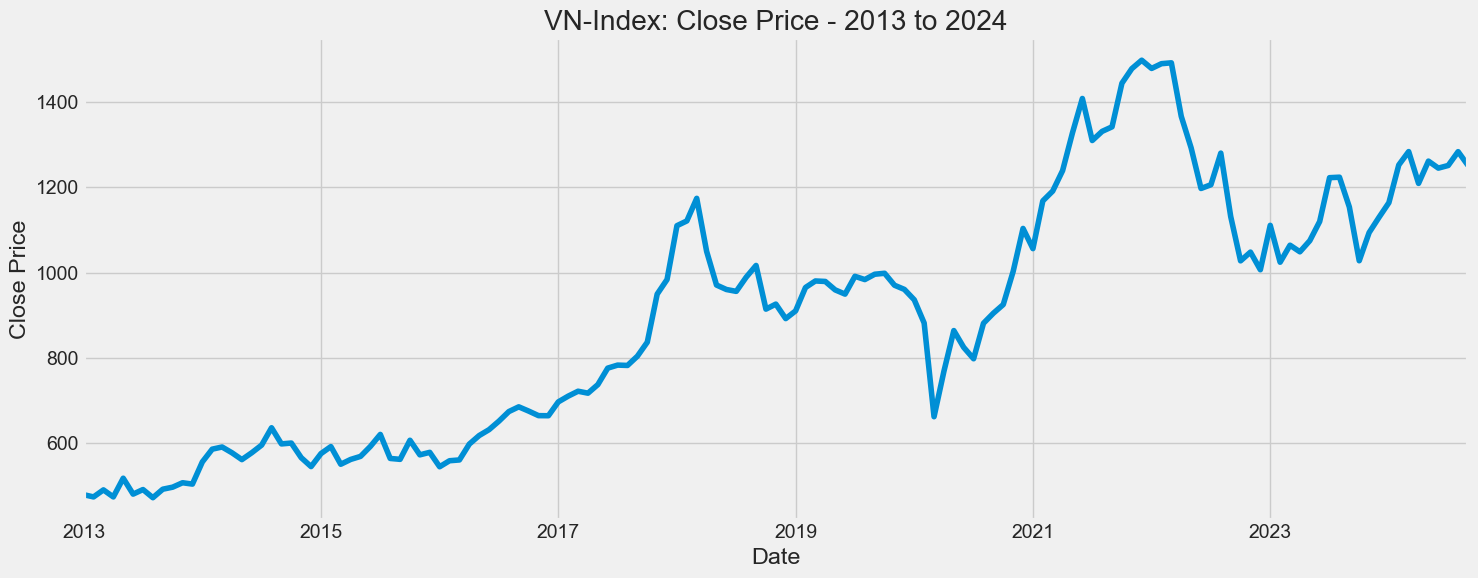

In [62]:
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15, 6))
plt.ylabel('Close Price')
plt.xlabel('Date')
plt.title(f"VN-Index: Close Price - 2013 to 2024")
df['Price'].plot()
plt.tight_layout()

In [63]:
# df = df.drop(columns=['Open', 'High','Low', 'Vol.','Change %'])
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
# df['Price'] = df['Price'].str.replace(',', '').astype(float)
# df['Year'] = df['Date'].dt.year
# df=df.set_index('Date')
# df.head


### Moving Avverage in Moths

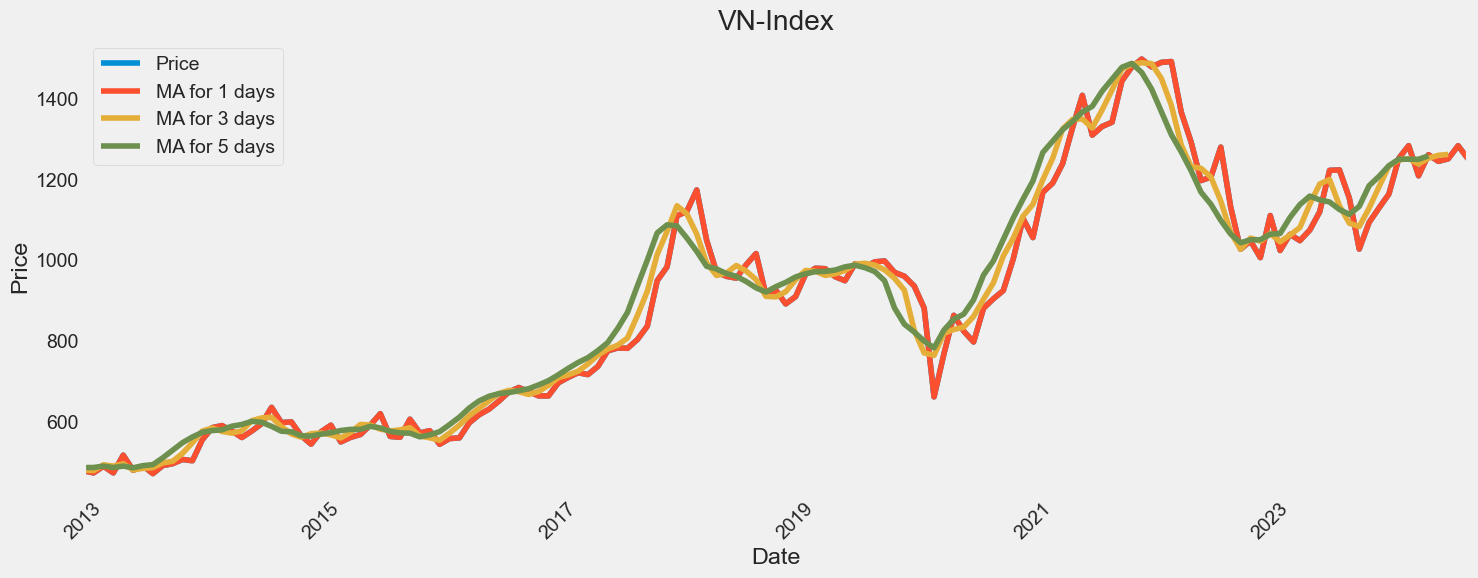

In [65]:
ma_days = [1, 3, 5]

for ma in ma_days:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Price'].rolling(ma).mean()

df[['Price'] + [f"MA for {ma} days" for ma in ma_days]].plot(figsize=(15, 6)).set_title('VN-Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## VN-Index (day)

### Moving Average

In [54]:
df_day = pd.read_csv("C:\Code\VN-Index\Raw Data\VN-Index(daily).csv")

In [55]:
df_day.head

<bound method NDFrame.head of            Date     Price      Open      High       Low     Vol. Change %
0    01-09-2024  1,251.71  1,283.87  1,283.87  1,244.79      NaN   -2.50%
1    01-08-2024  1,283.87  1,251.51  1,290.45  1,184.53   15.47B    2.59%
2    01-07-2024  1,251.51  1,245.32  1,297.96  1,218.65   15.64M    0.50%
3    01-06-2024  1,245.32  1,261.72  1,306.01  1,240.15   18.12M   -1.30%
4    01-05-2024  1,261.72  1,212.13  1,285.63  1,206.28   19.39M    4.32%
..          ...       ...       ...       ...       ...      ...      ...
136  01-05-2013    518.39    474.54    526.58    470.81    1.50M    9.25%
137  01-04-2013    474.51    490.66    518.46    466.56  926.70K   -3.37%
138  01-03-2013    491.04    476.51    500.59    461.61    1.05M    3.47%
139  01-02-2013    474.56    477.11    497.87    459.64    1.15M   -1.09%
140  01-01-2013    479.79    415.50    490.89    413.68    1.83M   15.97%

[141 rows x 7 columns]>

In [56]:
df_day['Date']=pd.to_datetime(df_day['Date'])
df_day['Year'] = df_day['Date'].dt.year
df_day=df_day.set_index('Date')
df_day['Price'] = df_day['Price'].str.replace(',', '').astype(float)
df_day.head()

,Price,Open,High,Low,Vol.,Change %,Year
Date,,,,,,,
2024-01-09,1251.71,"1,283.87","1,283.87","1,244.79",NaN,-2.50%,2024
2024-01-08,1283.87,"1,251.51","1,290.45","1,184.53",15.47B,2.59%,2024
2024-01-07,1251.51,"1,245.32","1,297.96","1,218.65",15.64M,0.50%,2024
2024-01-06,1245.32,"1,261.72","1,306.01","1,240.15",18.12M,-1.30%,2024
2024-01-05,1261.72,"1,212.13","1,285.63","1,206.28",19.39M,4.32%,2024


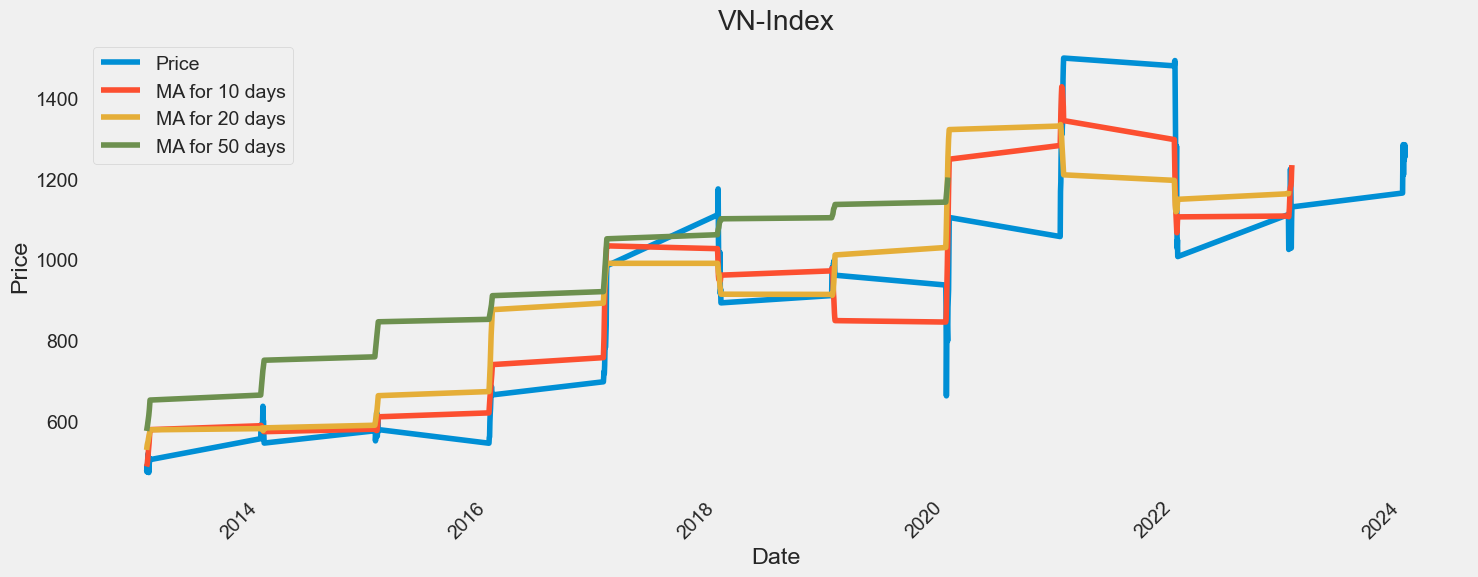

In [57]:
ma_days = [10, 20, 50]

for ma in ma_days:
    column_name = f"MA for {ma} days"
    df_day[column_name] = df_day['Price'].rolling(ma).mean()

df_day[['Price'] + [f"MA for {ma} days" for ma in ma_days]].plot(figsize=(15, 6)).set_title('VN-Index')
plt.ylabel('Price')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

## VN-Index (daily)